# Visualizing the literacy rate among provinces in Vietnam

In this notebook, I will visualize the literacy rate among provinces in Vietnam as the title shows. The 

### Importing necessary libraries

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd
import geopandas as gpd

### Loading the data

In [116]:
# Load the data
data_path = "illiteracy.csv"
data = pd.read_csv("illiteracy.csv", sep=";")


full_data_path = "illiteracy_full.csv"
full_data = pd.read_csv(full_data_path, sep=";")

# Load the GeoJSON file containing the Vietnam boundaries
vietnam_geojson_path_1 = "vietnam.geojson"
vietnam_geojson_path_2 = "vietnam_2.geojson"
vietnam_map = gpd.read_file(vietnam_geojson_path_1)
vietnam_map_2 = gpd.read_file(vietnam_geojson_path_2)

c:\Long\Coding\ForFun\venv\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [117]:
vietnam_map

,cartodb_id,id_1,name,slug,geometry
0,17,33,Kiên Giang,vietnam-kiengiang,"MULTIPOLYGON (((105.40141 10.04024, 105.53898 ..."
1,62,49,Quảng Ninh,vietnam-quangninh,"MULTIPOLYGON (((106.53680 21.05216, 106.43977 ..."
2,47,11,Bình Phước,vietnam-binhphuoc,"MULTIPOLYGON (((106.75164 11.46867, 106.70483 ..."
3,44,12,Bình Thuận,vietnam-binhthuan,"MULTIPOLYGON (((107.50771 11.01104, 107.39390 ..."
4,26,18,Cà Mau,vietnam-camau,"MULTIPOLYGON (((105.26105 9.17828, 105.28011 9..."
...,...,...,...,...,...
58,39,56,Thừa Thiên - Huế,vietnam-thuathienhue,"MULTIPOLYGON (((107.57778 16.57250, 107.64472 ..."
59,46,57,Thanh Hóa,vietnam-thanhhoa,"MULTIPOLYGON (((105.17656 19.89632, 105.15601 ..."
60,55,52,Sơn La,vietnam-sonla,"MULTIPOLYGON (((104.64836 21.38327, 104.73264 ..."
61,41,47,Quảng Nam,vietnam-quangnam,"MULTIPOLYGON (((108.47603 15.67618, 108.59167 ..."


In [118]:
vietnam_map_2

,Name,Note,geometry
0,An Giang,NaN,"MULTIPOLYGON (((105.18712 10.91317, 105.18719 ..."
1,Ba Ria - Vung Tau,NaN,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,Bac Giang,NaN,"MULTIPOLYGON (((106.18304 21.60530, 106.18034 ..."
3,Bac Kan,NaN,"MULTIPOLYGON (((106.18298 22.38830, 106.18589 ..."
4,Bac Lieu,NaN,"MULTIPOLYGON (((105.37226 9.59691, 105.37281 9..."
...,...,...,...
60,Yen Bai,NaN,"MULTIPOLYGON (((104.84701 22.18620, 104.84696 ..."
61,Da Nang,Hoang Sa (Da Nang city),"MULTIPOLYGON (((111.21578 15.77342, 111.20997 ..."
62,Da Nang,NaN,"MULTIPOLYGON (((107.91821 16.20767, 107.92228 ..."
63,Khanh Hoa,Truong Sa (Khanh Hoa),"MULTIPOLYGON (((113.59087 6.95462, 113.58326 6..."


63 provinces, that's correct, let's move on

In [119]:
data.name

0         Hà Nội
1      Vĩnh Phúc
2       Bắc Ninh
3     Quảng Ninh
4      Hải Dương
         ...    
58       Cần Thơ
59     Hậu Giang
60     Sóc Trăng
61      Bạc Liêu
62        Cà Mau
Name: name, Length: 63, dtype: object

In [120]:
full_data.name

0         Hà Nội
1      Vĩnh Phúc
2       Bắc Ninh
3     Quảng Ninh
4      Hải Dương
         ...    
58       Cần Thơ
59     Hậu Giang
60     Sóc Trăng
61      Bạc Liêu
62        Cà Mau
Name: name, Length: 63, dtype: object

The dataframe from the csv file also has the correct number of provinces. Now I'll try to have a look at the map plot before merging two dataframes together

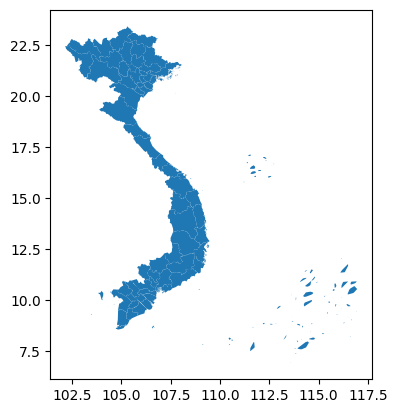

In [121]:
vietnam_map.plot()
plt.show()

In [122]:
print(vietnam_map.shape)
print(data.shape)
merged = vietnam_map.merge(data) # Merging the dataframes
merged



(63, 5)
(63, 2)


,cartodb_id,id_1,name,slug,geometry,2020
0,17,33,Kiên Giang,vietnam-kiengiang,"MULTIPOLYGON (((105.40141 10.04024, 105.53898 ...",91.58
1,62,49,Quảng Ninh,vietnam-quangninh,"MULTIPOLYGON (((106.53680 21.05216, 106.43977 ...",97.06
2,47,11,Bình Phước,vietnam-binhphuoc,"MULTIPOLYGON (((106.75164 11.46867, 106.70483 ...",94.29
3,44,12,Bình Thuận,vietnam-binhthuan,"MULTIPOLYGON (((107.50771 11.01104, 107.39390 ...",94.45
4,26,18,Cà Mau,vietnam-camau,"MULTIPOLYGON (((105.26105 9.17828, 105.28011 9...",96.24
...,...,...,...,...,...,...
58,39,56,Thừa Thiên - Huế,vietnam-thuathienhue,"MULTIPOLYGON (((107.57778 16.57250, 107.64472 ...",93.09
59,46,57,Thanh Hóa,vietnam-thanhhoa,"MULTIPOLYGON (((105.17656 19.89632, 105.15601 ...",96.92
60,55,52,Sơn La,vietnam-sonla,"MULTIPOLYGON (((104.64836 21.38327, 104.73264 ...",80.67
61,41,47,Quảng Nam,vietnam-quangnam,"MULTIPOLYGON (((108.47603 15.67618, 108.59167 ...",95.72


In [123]:
merged_full = vietnam_map.merge(full_data)
merged_full

,cartodb_id,id_1,name,slug,geometry,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Early 2021
0,17,33,Kiên Giang,vietnam-kiengiang,"MULTIPOLYGON (((105.40141 10.04024, 105.53898 ...",89.9,91.3,92.5,92.6,92.3,91.7,91.9,91.3,90.7,91.4,90.9,93.4,91.58,93.75
1,62,49,Quảng Ninh,vietnam-quangninh,"MULTIPOLYGON (((106.53680 21.05216, 106.43977 ...",96.3,95.5,96.9,96.9,95.5,95.5,97.2,96.8,97.4,97.1,96.8,97.0,97.06,97.15
2,47,11,Bình Phước,vietnam-binhphuoc,"MULTIPOLYGON (((106.75164 11.46867, 106.70483 ...",94.3,91.8,94.1,94.9,92.8,93.3,92.7,93.4,95.3,92.9,91.1,93.8,94.29,93.44
3,44,12,Bình Thuận,vietnam-binhthuan,"MULTIPOLYGON (((107.50771 11.01104, 107.39390 ...",93.8,92.0,92.8,93.9,93.3,93.9,93.0,93.3,93.7,94.0,93.2,94.6,94.45,95.09
4,26,18,Cà Mau,vietnam-camau,"MULTIPOLYGON (((105.26105 9.17828, 105.28011 9...",96.1,95.5,95.9,95.7,96.0,95.5,96.0,95.6,95.3,95.8,96.4,96.6,96.24,96.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,39,56,Thừa Thiên - Huế,vietnam-thuathienhue,"MULTIPOLYGON (((107.57778 16.57250, 107.64472 ...",91.7,91.3,91.0,92.1,93.5,92.9,92.5,92.6,93.2,92.5,92.2,94.0,93.09,93.65
59,46,57,Thanh Hóa,vietnam-thanhhoa,"MULTIPOLYGON (((105.17656 19.89632, 105.15601 ...",95.5,95.4,94.5,95.3,95.4,95.6,95.8,96.0,95.9,96.3,95.9,97.3,96.92,96.69
60,55,52,Sơn La,vietnam-sonla,"MULTIPOLYGON (((104.64836 21.38327, 104.73264 ...",80.4,76.4,77.0,78.3,74.9,75.5,75.8,77.7,77.1,76.6,77.5,78.9,80.67,80.32
61,41,47,Quảng Nam,vietnam-quangnam,"MULTIPOLYGON (((108.47603 15.67618, 108.59167 ...",93.9,94.6,92.1,93.7,95.1,94.9,94.5,94.8,95.3,95.7,95.0,96.2,95.72,95.84


# Actually plotting the map with annotations

## A static map which show statistics in 2020

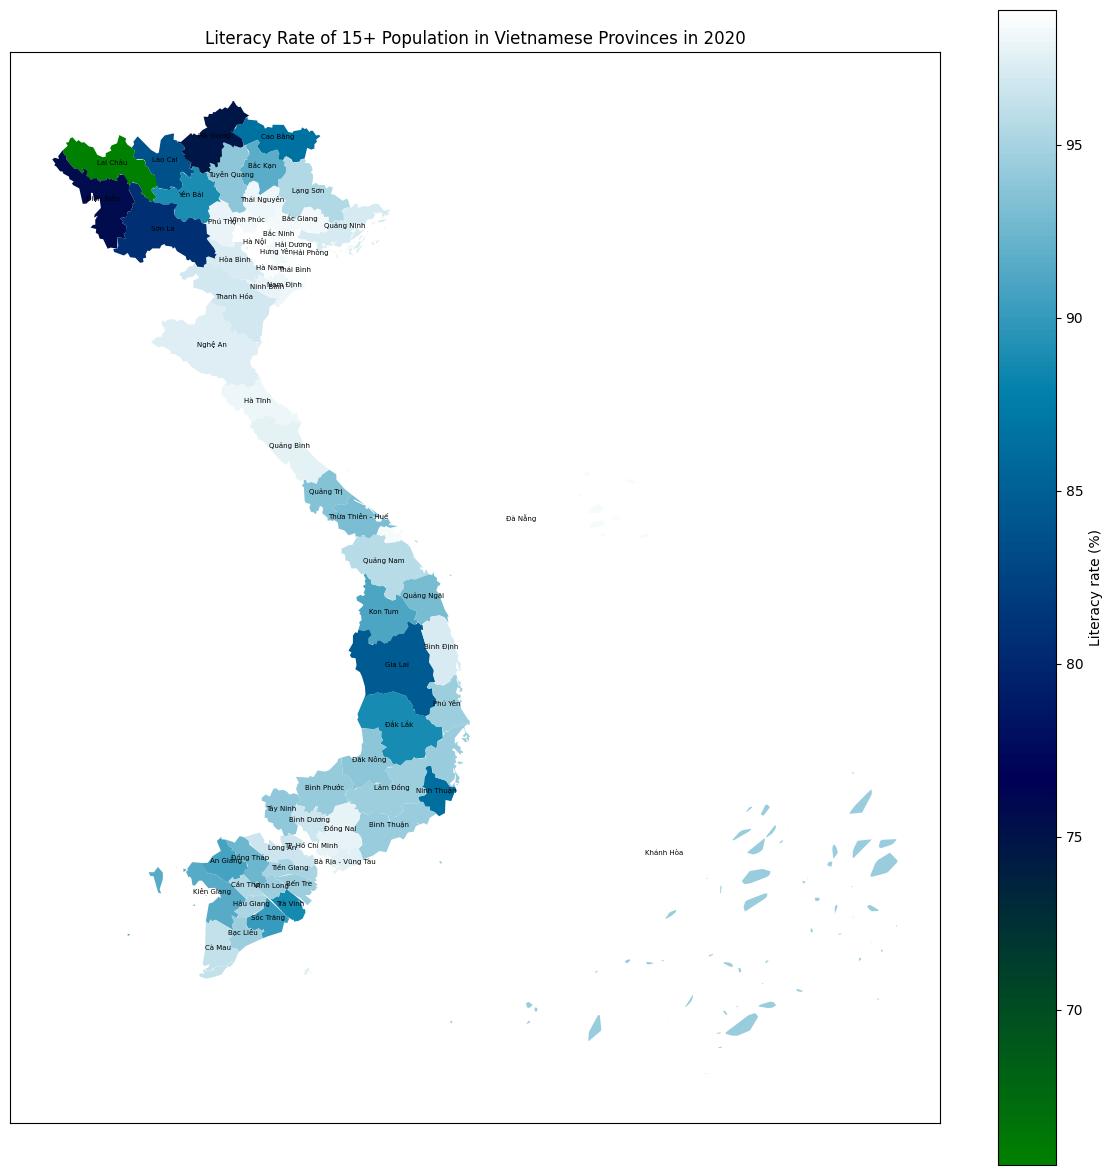

In [124]:
merged.plot(column = '2020', legend=True, legend_kwds={"label": "Literacy rate (%)", "orientation": "vertical"}, cmap="ocean", figsize=(15, 15))
plt.title("Literacy Rate of 15+ Population in Vietnamese Provinces in 2020")

plt.xticks([])
plt.yticks([])


for idx, row in merged.iterrows():
    plt.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0],horizontalalignment='center', fontsize=5, color='black')

plt.figsize=(100, 100)
plt.show()


## This time I'll try to make an interactive map using Matplotlib Animation Classes


In [125]:
years = ['2006', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Early 2021'] # List of years

# merged_full.plot(column = '2020', legend=True, legend_kwds={"label": "Literacy rate (%)", "orientation": "vertical"}, cmap="ocean", figsize=(15, 15))
# plt.title("Literacy Rate of 15+ Population in Vietnamese Provinces in 2020")

# plt.xticks([])
# plt.yticks([])


# set up the figure and axes for the map
fig = plt.figure(figsize=(15, 15))


def update(frame):
    # Clear the previous map
    plt.clf()

    # Select the column for the current frame
    column_name = merged_full.columns[frame]

    # Plot the frame
    merged_full.plot(column=column_name, legend=True, legend_kwds={"label": "Literacy rate (%)", "orientation": "vertical"}, cmap="ocean", figsize=(15, 15))

    plt.title("Literacy Rate of 15+ Population in Vietnamese Provinces in " + frame)
    plt.xticks([])
    plt.yticks([])
    for _, row in merged_full.iterrows():
        plt.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=5, color='black')


anim = animation.FuncAnimation(fig, update, frames=years, interval=30, repeat=True)

plt.show()

<Figure size 1500x1500 with 0 Axes>

## Oops, something happened there. I shall try the thing with widgets first

In [126]:
from matplotlib.widgets import Slider, Button

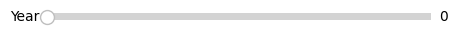

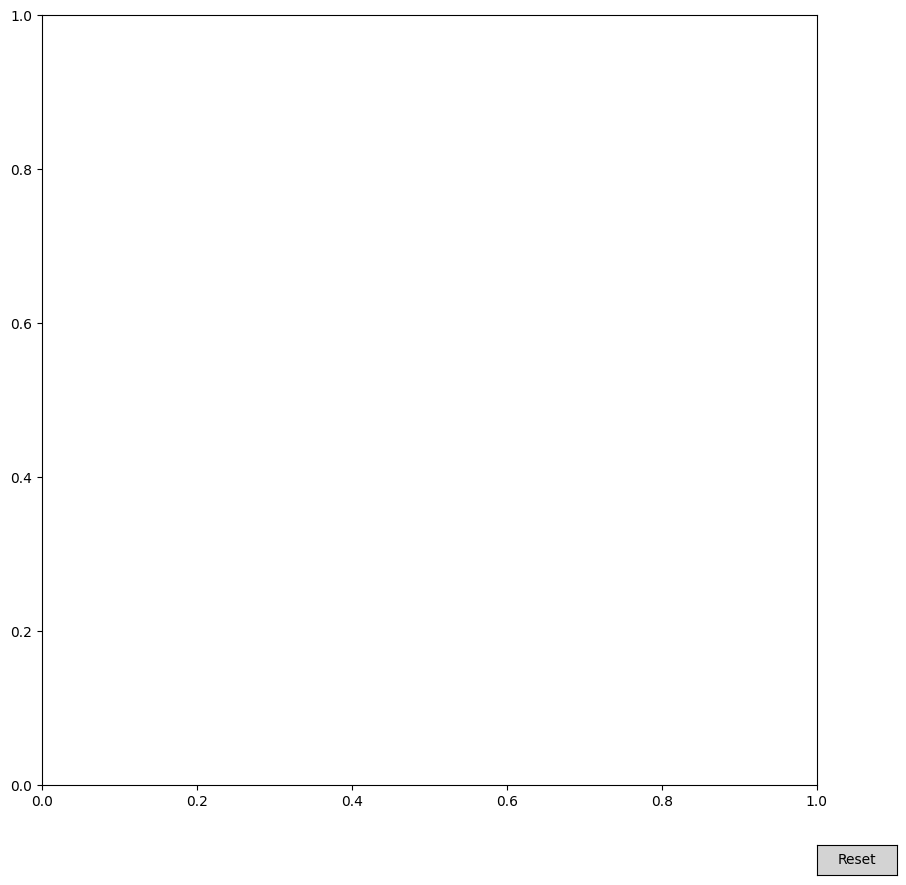

In [127]:
# Add a slider to control the year
ax_slider = plt.axes([0.2, 0.02, 0.6, 0.03])
slider = Slider(ax_slider, 'Year', 0, len(merged_full.columns)-1, valinit=0, valstep=1)

# Set up the figure and axes for the map
fig, ax = plt.subplots(figsize=(10, 10))

def update_map(frame):
    # Clear the previous plot
    ax.clear()

    # Select the column for the current frame
    column_name = merged_full.columns[frame]  # Modify this according to your column names

    # Plot the updated data based on the selected column
    merged_full.plot(column=column_name, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.title("Literacy Rate of 15+ Population in Vietnamese Provinces in " + frame)
    plt.xticks([])
    plt.yticks([])
    for _, row in merged_full.iterrows():
        plt.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=5, color='black')

    # Add any desired visual elements, such as labels or titles

    # Optionally, customize the plot appearance for each frame
    # Example: ax.set_title("Year: {}".format(column_name))

# Define the function to be called when the slider value changes
def on_slider_change(val):
    frame = int(val)
    update_map(frame)
    plt.draw()

slider.on_changed(on_slider_change)

# Add a button to reset the animation
ax_button = plt.axes([0.9, 0.02, 0.08, 0.03])
button = Button(ax_button, 'Reset', color='lightgray', hovercolor='0.95')

# Define the function to be called when the button is clicked
def on_button_click(event):
    slider.set_val(0)

button.on_clicked(on_button_click)

# Display the animation
plt.show()

## Data source
- [PX Web - General Statistics Office of Vietnam](https://www.gso.gov.vn/px-web-2/?pxid=V0226&theme=D%C3%A2n%20s%E1%BB%91%20v%C3%A0%20lao%20%C4%91%E1%BB%99ng "You can get many more data from here")
- [Vietnam Geojson file](https://github.com/nguyenduy1133/Free-GIS-Data/blob/main/VietNam/Administrative/Provinces_included_Paracel_SpratlyIslands.geojson)